In [14]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import cv2

In [9]:
for dirname, _, filenames in os.walk('C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0001-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0003-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0005-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0006-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0007-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0009-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0010-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0011-0001-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0011-0001-0002.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0011-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0013-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs\train\NORMAL\IM-0015-0001.jpeg
C:/Use

In [5]:
labels = ['NORMAL', 'PNEUMONIA']
img_size=150
def get_training_data(data_dir):
    data=[]
    for label in labels:
        path=os.path.join(data_dir, label)
        class_num=labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr=cv2.resize(img_arr, (img_size, img_size))

                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [15]:
train = get_training_data('C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs/train/')
test = get_training_data('C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/inputs/val/')

OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-uzca7qz1\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-uzca7qz1\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



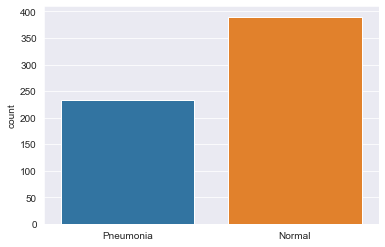

In [16]:
l = []
for i in train:
    if(i[1] == 0):
        l.append('Pneumonia')
    else:
        l.append('Normal')

sns.set_style('darkgrid')
sns.countplot(l)
plt.show()

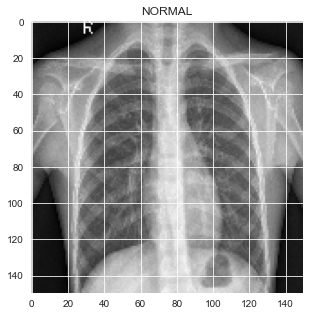

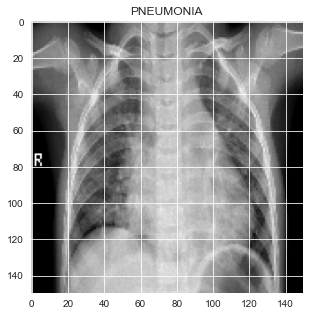

In [21]:
#Previewing the images of both classes
plt.figure(figsize=(5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize=(5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])
plt.show()

In [24]:
x_train=[]
y_train=[]

x_test=[]
y_test=[]

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [25]:
#Normalize the data
x_train = np.array(x_train)/255
x_test = np.array(x_test)/255

In [26]:
#resizing data
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

### Data Agumendation 

In [28]:
#In other to avoid overfitting we perform data agumentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    zoom_range= 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
)
datagen.fit(x_train)

### Training the model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization


model=Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 64)       

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factors=0.3, min_lr=0.000001)

In [38]:
history= model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=12, callbacks=[learning_rate_reduction])

Epoch 1/12
20/20 [==============================] - 56s 3s/step - loss: 4.6247 - acc: 0.6250
Epoch 2/12
20/20 [==============================] - 52s 3s/step - loss: 0.5939 - acc: 0.7356
Epoch 3/12
20/20 [==============================] - 53s 3s/step - loss: 0.7520 - acc: 0.7404
Epoch 4/12
20/20 [==============================] - 52s 3s/step - loss: 0.7790 - acc: 0.7356
Epoch 5/12
20/20 [==============================] - 50s 2s/step - loss: 0.5482 - acc: 0.7692
Epoch 6/12
20/20 [==============================] - 49s 2s/step - loss: 0.5289 - acc: 0.7901
Epoch 7/12
20/20 [==============================] - 49s 2s/step - loss: 0.4961 - acc: 0.7917
Epoch 8/12
20/20 [==============================] - 50s 2s/step - loss: 0.6177 - acc: 0.7708
Epoch 9/12
20/20 [==============================] - 48s 2s/step - loss: 0.4688 - acc: 0.7869
Epoch 10/12
20/20 [==============================] - 47s 2s/step - loss: 0.4321 - acc: 0.8253
Epoch 11/12
20/20 [==============================] - 50s 2s/step - lo

In [39]:
print('Loss of the model is - ', model.evaluate(x_test, y_test)[0])
print('Accuracy of the model is - ', model.evaluate(x_test, y_test)[1]*100, '%')

16/16 [==============================] - 1s 49ms/sample - loss: 33.1112 - acc: 0.5000
Loss of the model is -  33.111175537109375
16/16 [==============================] - 0s 8ms/sample - loss: 33.1112 - acc: 0.5000
Accuracy of the model is -  50.0 %
